# Метод максимального правдоподобия

In [ ]:
#all imports here please
import pickle as pkl

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Свойства ММП оценок для модели нормального распределения

Рассмотрим следующую модель из независимых векторных наблюдений $X_1,..,X_n$:

$$X_i \overset{iid}{\sim} \mathcal{N}(\mu, \Sigma).$$

Постройте и исследуйте оценку для вектора матожиданий $\mu$ и ковариационной матрицы $\Sigma$ методом максимального правдоподобия.


### Правдоподобие

*Запишите функцию правдоподобия и ее логарифм.*

Функция правдоподобия (ковариационная матрица $\mathbf{\Sigma}$ симметричная положительно определённая): $ L(\mathbf{ \mu, \Sigma})  = \prod_{i=1}^n f(X_i) = \prod_{i=1}^n \frac{1}{(2 \pi)^{m/2} \mathbf{\sqrt{det(\Sigma)}}} \exp \{ - \frac{1}{2} (X_i - \mu)^T \Sigma^{-1} (X_i - \mu) \}$

Логарифм функции правдоподобия:	$\log L(\mathbf{ \mu, \Sigma})  = \log\prod_{i=1}^n f(X_i) = \sum_{i=1}^n \log f(X_i) = \sum_{i=1}^n \left( - \frac{m}{2} \log (2 \pi) - \frac{1}{2} \log  \mathbf{det(\Sigma)}  - \frac{1}{2}   (X_i - \mu)^T \Sigma^{-1} (X_i - \mu)  \right) = - \frac{nm}{2} \log (2 \pi) - \frac{n}{2} \log \mathbf{det(\Sigma)}  - \frac{1}{2}  \sum_{i=1}^n  (X_i - \mu)^T \Sigma^{-1} (X_i - \mu) $

### ММП-оценка

*Найдите выражение для ММП-оценки и сравните решение с решением в одномерном случае.*

${\mathrm d}f( \mu) = {\mathrm d}(x - \mu)^T \Sigma^{-1} (x - \mu) = ({\mathrm d}(x - \mu)^T) \Sigma^{-1} (x - \mu) + (x - \mu)^T({\mathrm d}\Sigma^{-1} (x - \mu)) =  - ({\mathrm d}\mu)^T\Sigma^{-1} (x - \mu) - (x - \mu)^T \Sigma^{-1}{\mathrm d} \mu = -((x - \mu)^T(\Sigma^{-1})^T + (x - \mu)^T \Sigma^{-1}){\mathrm d} \mu = /\text{так как } \Sigma \text{ симмитричная матрица, то }\\
\Sigma^{-1} = (\Sigma^T)^{-1} = (\Sigma^{-1})^T /= -2(x - \mu)^T(\Sigma^{-1})^T {\mathrm d} \mu,$

тогда $\frac{\partial f( \mu)}{\partial \mu} = -2\Sigma^{-1}(x-\mu)$, следовательно:

$\frac{\partial }{\partial \mu}\log L(\mathbf{ \mu, \Sigma}) = - \frac{1}{2}  \sum_{i=1}^n \frac{\partial }{\partial \mu}(X_i - \mu)^T \Sigma^{-1} (X_i - \mu) = \sum_{i=1}^n\Sigma^{-1}(X_i - \mu) = 0 $

 Тогда, так как $\Sigma$ положительно определённая матрица(а значит и $\Sigma^{-1}$ положительно определённая), то равенство достигается только при:
 $\sum_{i=1}^n(X_i - \mu) = 0$, следовательно оценка ММП для $\mu$: $\tilde{\mu}= \frac{1}{n}\sum_{i=1}^nX_i$


Теперь воспользуемся тем, что $\frac{\partial}{\partial X} \mathrm{tr}(X^{-1}A) = -(X^{-1})^TA^T(X^{-1})^T$, $\frac{\partial}{\partial X} \log \det(X) = (X^{-1})^T$:
 $\frac{\partial }{\partial \Sigma}\log L(\mathbf{ \mu, \Sigma}) =-\frac{n}{2}\frac{\partial }{\partial \Sigma}\log \det \Sigma - \frac{1}{2}  \sum_{i=1}^n \frac{\partial }{\partial \Sigma}(X_i - \mu)^T \Sigma^{-1} (X_i - \mu) = -\frac{n}{2}(\Sigma^{-1})^T - \frac{1}{2}  \sum_{i=1}^n \frac{\partial }{\partial \Sigma}\mathrm{tr}((X_i - \mu)^T \Sigma^{-1} (X_i - \mu)) = -\frac{n}{2}(\Sigma^{-1})^T - \frac{1}{2}  \sum_{i=1}^n \frac{\partial }{\partial \Sigma}\mathrm{tr}(\Sigma^{-1} (X_i - \mu)(X_i - \mu)^T) =  -\frac{n}{2}(\Sigma^{-1})^T + \frac{1}{2}  \sum_{i=1}^n(\Sigma^{-1})^T (X_i - \mu)(X_i - \mu)^T (\Sigma^{-1})^T = 0$
 Тогда:
 $(\Sigma^{-1})^T (\sum_{i=1}^n(X_i - \mu)(X_i - \mu)^T )(\Sigma^{-1})^T = n(\Sigma^{-1})^T$

 $(\Sigma)^T(\Sigma^{-1})^T (\sum_{i=1}^n(X_i - \mu)(X_i - \mu)^T )(\Sigma^{-1})^T (\Sigma)^T= n(\Sigma)^T(\Sigma^{-1})^T(\Sigma)^T$

 $\sum_{i=1}^n(X_i - \mu)(X_i - \mu)^T = n\Sigma^T$

  Cледовательно оценка ММП для $\Sigma$: $\tilde{\Sigma} = \frac{1}{n}\sum_{i=1}^n (X_i - \mu)(X_i - \mu)^T $

  Если подставим вместо $\mu$ полученное ранее значение $\tilde{\mu}$, то $\tilde{\Sigma} = \frac{1}{n}\sum_{i=1}^n (X_i - \bar{X})(X_i - \bar{X})^T $

##  Свойства ММП оценок для модели равномерного распределения

Рассмотрим модель выборки $X_1,..,X_n$ из наблюдений

$X_i \overset{iid}{\sim} U[0,a]$

### Правдоподобие

*Запишите функцию правдоподобия и ее логарифм.*

$ L(a)  = \prod_{i=1}^n f_{X_i}(x_i) = \prod_{i=1}^n \frac{1}{a}\mathbf{I}\{ 0\leq x_i \leq a\} = \frac{1}{a^n}\mathbf{I}\{ 0\leq x_{(1)}, x_{(n)} \leq a\}$

$ \log L(a) = -n\log(a)\mathbf{I}\{ 0\leq x_{(1)}, x_{(n)} \leq a\}$

### ММП-оценка параметра $a$

*Найдите выражение для ММП-оценки параметра $a$*.

Для максимизации функции правдоподобия параметр $a$ должен быть таким, чтобы $0\leq x_{(n)} \leq a$, иначе функция правдоподобия будет равна нулю. В таком случае (при $x_{(n)} \leq a$) функция правдоподобия: $ L(a)  = \frac{1}{a^n}$ - убывающая функция на промежутке $(0; +\infty)$, следовательно, максимум функция будет принимать при минимальном возможном $a$, в нашем случае при $a = x_{(n)}$.

Оценка ММП для $a$: $\tilde{a} = x_{(n)}$

##  Оцениваем модель охлаждения

[(Другой) закон Ньютона](https://en.wikipedia.org/wiki/Newton%27s_law_of_cooling)  -- простая математическая модель охлаждения(или нагревания) тела

$$
\frac{dT}{dt} = r (T_{env} - T(t)),
$$

это дифференциальное уравнение первого порядка, которое в непрерывном (то есть, в любой момент $t$) показывает, какая должна быть температура у тела, если дана начальная температура $T(0)=T_0$. Температурные единицы измерения -- Кельвины, $r$ -- это некоторая константа, зависящая от самого тела, от состава среды и т.п. . Это приближённый закон.

Вообще константа $r$ неизвестна априори и если мы хотим делать какое-то устройство, которое использует такую модель, мы должны как-то оценить $r$. Один из вариантов -- померить температуру среды (полагаем её константной), нагреть тело до какой-то температуры $T_0$, а потом оставить остывать и замерять через разные промежутки времени его температуру. По итогам таких наблюдений получится датасет
$$
T_{t_0},T_{t_1},..,T_{t_n}, ~~ t_0=0.
$$

Осталось придумать вероятностную модель. Например, мы можем записать приближённое дискретизированное по времени уравнение, используя метод Эйлера:

$$
T_{t_{i+1}} = T_{t_{i}} + r (T_{env} - T_{t_{i}}) \Delta t_i, ~~  \Delta t_i = t_{i+1} - t_i,
$$

а дальше предлагать разные варианты оценивания.

### Правдоподобие

С учётом ошибок измерений и необъяснимых факторов среды, договорившись измерять температуру через равные промежутки времени $\Delta t_i= \Delta t$, можно предположить модель, очень похожую на модель авторегрессии $AR(1)$:

$$
T_{i+1} = (1 - r\Delta t)T_{i} + r T_{env} \Delta t + \varepsilon_{i+1}, ~~ \varepsilon_{i+1} \sim_{iid} N(0,\sigma^2).
$$

1. Предполагая $T_{env}$ и $\Delta t$ данными, определите параметры модели, которые нужно оценивать и выведите функцию лог-правдоподобия.

2. Выведите оценки ММП для данной модели.

Параметрами модели будут неизвестные $r$ и $\sigma^2$. Сделаем замену $Z_i = T_{i+1} -(1 - r\Delta t)T_{i} - r T_{env} \Delta t = \varepsilon_{i+1}$, тогда $Z_i \sim_{iid} N(0,\sigma^2)$

Функция лог-правдоподобия: $l(r, \sigma^2) = \log\prod_{i=0}^{n-1} f(Z_i) =\sum_{i=0}^{n-1}\log(\frac{1}{\sigma\sqrt{2\pi}}\exp \{-\frac{(T_{i+1} -(1 - r\Delta t)T_{i} - r T_{env} \Delta t)^2}{2\sigma^2} \}) = -\frac{n}{2}\log\sigma^2-\frac{n}{2}\log2\pi -\frac{1}{2\sigma^2}\sum_{i=0}^{n-1}(T_{i+1} -(1 - r\Delta t)T_{i} - r T_{env} \Delta t)^2$

$\frac{\partial }{\partial r}l(r,\sigma^2) = -\frac{1}{2\sigma^2}\sum_{i=0}^{n-1}\frac{\partial }{\partial r}((T_{i+1} - T_{i}) + r\Delta t(T_{i} - T_{env}))^2 = -\frac{1}{2\sigma^2}\sum_{i=0}^{n-1}2((T_{i+1} - T_{i}) + r\Delta t(T_{i} - T_{env}))(\Delta t(T_{i} - T_{env})) = -\frac{1}{\sigma^2}\sum_{i=0}^{n-1}(T_{i+1} - T_{i})\Delta t(T_{i} - T_{env}) -\frac{1}{\sigma^2} \sum_{i=0}^{n-1}r\Delta t^2(T_{i} - T_{env})^2 = 0$

 Тогда оценка $r$: $\tilde{r} = -\frac{\sum_{i=0}^{n-1}(T_{i+1} - T_{i})(T_{i} - T_{env})}{\sum_{i=0}^{n-1}\Delta t(T_{i} - T_{env})^2 }$

$\frac{\partial }{\partial \sigma^2}l(r,\sigma^2) = -\frac{n}{2\sigma^2} + \frac{1}{2\sigma^4}\sum_{i=0}^{n-1}Z_i^2=0$

Тогда оценка $\sigma^2$: $\tilde{\sigma}^2 =\frac{1}{n}\sum_{i=0}^{n-1}Z_i^2$

### Пишем модель


In [ ]:
class CoolingModel:

    def __init__(self, r, delta, sigma2):
        self.r = r
        self.sigma2 = sigma2
        self.delta = delta

    def step(self,T0,Tenv):
        """Makes one step in time

        Args:
            T0 (float[]): current temperature (NTraj,)
            Tenv (float[]): current environment temperature (NTraj,)
        Returns:
            T (float[]): next temperature (NTraj,)
        """
        epsilon = np.random.normal(0, np.sqrt(self.sigma2), size=T0.shape)
        T_next = (1 - self.r * self.delta) * T0 + self.r * Tenv * self.delta + epsilon
        return T_next

    def simulate(self, T0, NSteps, Tenv):
        """Simulates NTraj trajectories of cooling process

        Args:
            T0 (float[]): initial temperature (NTraj,)
            NSteps (int): number of time steps
            Tenv (float): environment temperature
        Returns:
            trajs (float[]): simulation result (NTraj,NSteps)
        """
        Tenv_arr = np.ones_like(T0)*Tenv
        trajs = np.zeros([T0.shape[0],NSteps+1])
        trajs[:,0] = T0
        for i in range(NSteps):
            trajs[:, i + 1] = self.step(trajs[:, i], Tenv_arr)

        return trajs

    def fit(self, temps, Tenv):
        """Fits the model using the given data

        Args:
            temps (float[]): temperatures (N,)
            Tenv (float): environment temperature
        """
        Tenv_arr = np.ones_like(temps[:-1])*Tenv
        numerator = np.sum((temps[1:] - temps[:-1])*(temps[:-1] - Tenv_arr))
        denominator = np.sum((temps[:-1] - Tenv_arr)** 2)
        r_hat = -numerator/(self.delta * denominator)
        z = (temps[1:] - temps[:-1]) + r_hat * self.delta * (temps[:-1] - Tenv_arr)
        sigma2_hat = np.sum(z ** 2)/len(z)
        self.r = r_hat
        self.sigma2 = sigma2_hat


In [ ]:
#params
r = 0.2 #1/sec
sigma2=0.02

#time stuff
NSteps = 1000
finalTime = 100
delta=finalTime/NSteps #sec

#number of simulations
NTrajs = 5

#temperatures
T0 = np.ones([NTrajs])*280 #K
Tenv = 300 #K

procModel = CoolingModel(r,delta,sigma2)
trajs = procModel.simulate(T0,NSteps,Tenv)

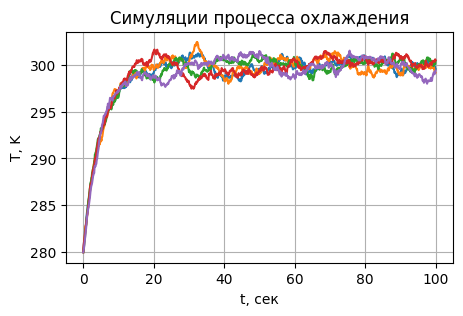

In [ ]:
ts = np.arange(0,finalTime+delta/2,delta) #+delta/2 to include the last value

f, ax = plt.subplots(figsize=(5,3))

ax.grid()
ax.set_title("Симуляции процесса охлаждения")
ax.set_xlabel("t, сек")
ax.set_ylabel("T, K")
ax.plot(ts,trajs.T)
plt.show()

### Оценка модели по данным


In [ ]:
with open("./coolingModel.pkl","rb") as f:
    dd = pkl.load(f)
    time = dd['time']
    Tenv = dd['Tenv']
    temperature = dd['temperature']
    delta = dd['delta']

In [ ]:
#random init
procModel = CoolingModel(0.1, delta, 0.1)
procModel.fit(temperature, Tenv)
print(f"Parameters:  r={procModel.r},sigma^2={procModel.sigma2}")

Parameters:  r=0.03608793300832803,sigma^2=0.015218767214311636


In [ ]:
NSteps = time.shape[0] - 1
finalTime = time[-1]

NTrajs = 5

T0 = np.ones([NTrajs])* temperature[0]
trajs = procModel.simulate(T0, NSteps,Tenv)


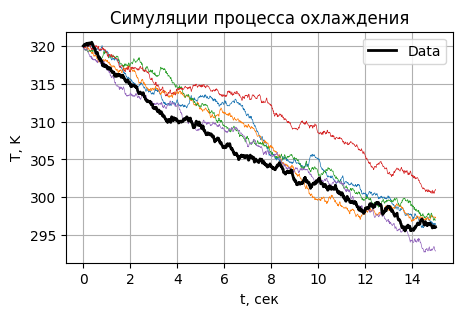

In [ ]:
ts = np.arange(0,finalTime+delta/2,delta) #+delta/2 to include the last value

f, ax = plt.subplots(figsize=(5,3))

ax.grid()
ax.set_title("Симуляции процесса охлаждения")
ax.set_xlabel("t, сек")
ax.set_ylabel("T, K")
ax.plot(ts,trajs.T, linewidth=0.5)
ax.plot(time, temperature, color="black", label="Data", linewidth=2)
ax.legend()
plt.show()

Как видим, наша оценка получилась достаточно хорошей, некоторые из полученных траекторий практически полностью совпадают с траекторией исходных данных.

##  Дискретная модель цен


### Броуновское движение

[Броуновское движение (или по-другому Винеровский процесс)](https://en.wikipedia.org/wiki/Wiener_process)  - это случайный процесс (набор случайных величин) $\{W_t\}_{t \geq 0}$ c непрерывным временем, который задётся так:

* $W_0 = 0$

* $W_t - W_s \sim \mathcal{N}(0, t-s)$, $0 \leq s \leq t$

* $W_{t_2} - W_{t_1}$ и $W_{t_4} - W_{t_3}$  независимы для $0 \leq t_1 \leq t_2 \leq t_3 \leq t_4$

Мы можем попытаться нарисовать значения процесса в любом конечном наборе точек $(t_i)_{i=0}^{N_t}$, это будут зависимые случайные величины. Удобнее всего для симуляции пользоваться последним свойством: если обозначить $\Delta t_i = t_{i+1} - t_i$, то

$$
W_{t_{i+1}} = W_{t_i} + \varepsilon_{i+1},
$$

где $W_{t_0}$ задано, а шумы $\varepsilon_{i+1} \sim N(0, \Delta t_i)$ независимы.

### Симуляция

*Реализуйте симуляцию этого дискретизированного процесса $(W_{t_i})_{i=0}^{N_t}$, используя данную сетку по времени $(t_i)_{i=0}^{N_t}$.*

In [ ]:
class BrownianMotion:

    def __init__(self):
        pass

    def sample(self, ts, Ntraj):
        """Returns a discrete set of observations

        Args:
            ts (float[]): time grid (T,)
            Ntraj (int): number of trajectories to sample
        Returns
            trajs (float[]): (Ntraj,T) samples
        """
        trajs = np.zeros([Ntraj,len(ts)])
        for i in range(1, len(ts)):
            delta_t = ts[i] - ts[i - 1]
            eps = np.random.normal(0, np.sqrt(delta_t), size=Ntraj)
            trajs[:, i] = trajs[:, i - 1] + eps
        return trajs

Проверим! Нарисуйте набор семплов наблюдений $W_{t_0},..,W_{t_{N_{t}}}$ из модели Броуновского движения при $t_0=0$ и $W_{t_0} = 0$.

In [ ]:
#example
Ntraj = 50
T=3
Nt = 100#number of time subdivisions
delta = T/Nt
ts = np.arange(0,T+delta/2 ,delta)# discrete points from [0,T]

bmProc = BrownianMotion()
trajs = bmProc.sample(ts,Ntraj)

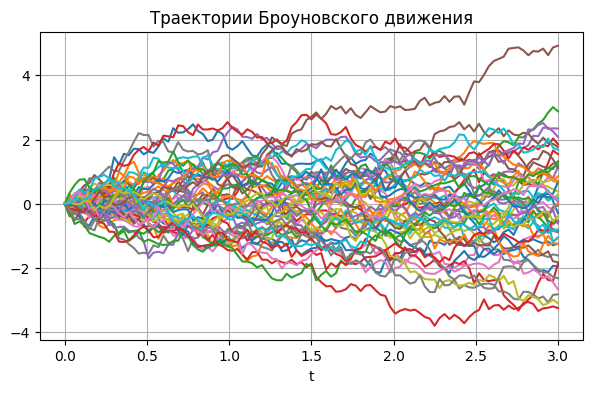

In [ ]:
f, ax = plt.subplots(figsize=(7,4))

ax.grid()
ax.set_title("Траектории Броуновского движения")
ax.set_xlabel("t")
ax.plot(ts,trajs.T)
plt.show()#if needed

## Геометрическое Броуновское движение

Геометрическое Броуновское движение (GBM) -- это модель

$$
S_t = S_0 \exp[(\mu - \frac{\sigma^2}{2})t + \sigma W_t],
$$

где параметр $\mu$ называется сносом (он связан с безрисковой процентной ставкой на рынке и выплатами по активу, например, дивидендами акции), а $\sigma$ -- волатильностью. Это один из базовых кирпичиков моделей финансовых рядов.

Пусть мы пронаблюдали набор значений $S_{t_1},..,S_{t_N}$, давайте получим оценки параметров и попробуем оценить их по данным.


### Параметры

Будем оценивать параметры $\mu$  и $\sigma$

### Правдоподобие

$S_i = S_0 \exp[(\mu - \frac{\sigma^2}{2})t_i + \sigma W_{t_i}]$

Положим $X_i = \log{S_i} = \log{S_0} + (\mu - \frac{\sigma^2}{2})t
_i + \sigma W_{t_i}$

Положим $\Delta X_i =X_{i+1} - X_{i}  = (\mu - \frac{\sigma^2}{2})(t_{i+1} - t_i) + \sigma(W_{t_{i+1}} - W_{t_i})$, тогда $\Delta X_i\sim \mathcal{N}((\mu - \frac{\sigma^2}{2})(t_{i+1} - t_i),  \sigma^2(t_{i+1}-t_i))$, тогда можем записать функцию правдоподобия
$ L(\mu, \sigma)  = \prod_{i=1}^{n-1} f(\Delta X_i) = \prod_{i=1}^{n-1} \frac{1}{\sqrt{2\pi\sigma^2(t_{i+1} - t_i)}} \exp\{ - \frac{(\Delta X_i - (\mu - \frac{\sigma^2}{2})(t_{i+1} - t_i))^2}{2\sigma^2(t_{i+1} - t_i)} \} $

$ l(\mu, \sigma)  = \log\prod_{i=1}^{n-1} f(\Delta X_i) = \sum_{i=1}^{n-1}-\log\sigma  - \frac{(\Delta X_i - (\mu - \frac{\sigma^2}{2})(t_{i+1} - t_i))^2}{2\sigma^2(t_{i+1} - t_i)} + const $

### ММП-оценки


$\frac{\partial }{\partial \mu}l(\mu,\sigma) = \sum_{i=1}^{n-1} \frac{(\Delta X_i - (\mu - \frac{\sigma^2}{2})(t_{i+1} - t_i))}{\sigma^2} = \frac{X_n - X_1 - (\mu - \frac{\sigma^2}{2})(t_n - t_1)}{\sigma^2} = 0$, следовательно оценка $\tilde{\mu} = \frac{X_n - X_1}{t_n - t_1} + \frac{\sigma^2}{2}$

$\frac{\partial }{\partial \sigma}l(\mu,\sigma) = \sum_{i=1}^{n-1}-\frac{1}{\sigma} - \frac{4(\Delta X_i - (\mu - \frac{\sigma^2}{2})(t_{i+1} - t_i))(t_{i+1}-t_i)^2\sigma^3-4(\Delta X_i - (\mu - \frac{\sigma^2}{2})(t_{i+1} - t_i))^2\sigma(t_{i+1} - t_{i})}{4\sigma^4(t_{i+1}-t_i)^2}= \sum_{i=1}^{n-1}\frac{\frac{\Delta{X_i}^2}{t_{i+1} - t_i} + (\mu^2-\frac{\sigma^4}{4})(t_{i+1}-t_i) - 2\mu\Delta{X_i}-\sigma^2}{\sigma^3} = \frac{1}{\sigma^3}((\mu^2-\frac{\sigma^4}{4})(t_n - t_1) -2(X_n - X_1)\mu- (n-1)\sigma^2 + \sum_{i=1}^{n-1}\frac{\Delta{X_i}^2}{t_{i+1} - t_i}) = /\text{подставим } \tilde{\mu}/ = \frac{1}{\sigma^3}(((\frac{X_n-X_1}{t_n-t_1})^2+\frac{(X_n-X_1)\sigma^2}{t_n-t_1}+\frac{\sigma^4}{4})(t_n - t_1)-\frac{\sigma^4}{4}(t_n - t_1) -2(X_n - X_1)(\frac{X_n - X_1}{t_n - t_1} + \frac{\sigma^2}{2})- (n-1)\sigma^2 + \sum_{i=1}^{n-1}\frac{\Delta{X_i}^2}{t_{i+1} - t_i}) = 0$, следователньо оценка $\tilde{\sigma}^2 = \frac{1}{n - 1}(-\frac{(X_n-X_1)^2}{t_n-t_1}+\sum_{i=1}^{n-1}\frac{(X_{i+1}-X_i)^2}{t_{i+1}-t_i})$

### Пишем модель

In [ ]:
class GBM:

    def __init__(self,mu,sigma):
        self.mu = mu
        self.sigma = sigma
        self.brownMotion = BrownianMotion()

    def sample(self, x0, ts):
        """Returns a discrete set of observations

        Args:
            x0 (float[]): set of initial conditions x_{ts[0]}  (Ntraj,)
            ts (float[]): time grid (T,)
        Returns
            trajs (float[]): (Ntraj,T) samples
        """
        Ntraj = x0.shape[0]
        W = self.brownMotion.sample(ts, Ntraj)
        trajs = np.zeros((Ntraj, len(ts)))
        trajs[:, 0] = x0
        for i in range(1, len(ts)):
            delta_t = ts[i] - ts[i - 1]
            trajs[:, i] = x0 * np.exp((self.mu - 0.5 * self.sigma ** 2) * ts[i] + self.sigma * W[:, i])
        return trajs

    def fit(self, st, delta):
        """Fits the parameters given the data (assuming the step size is constant and equal delta)

        Args:
            st (float[]): observations (T,)
            delta (flaot): time step size
        """
        log_S = np.log(st)
        delta_X = np.diff(log_S)
        n = delta_X.shape[0]
        change = log_S[-1] - log_S[0]
        self.sigma = np.sqrt((-(change**2) / n + np.sum(delta_X**2)) / (delta * n))
        self.mu = (change / (delta * n)) + 0.5 * self.sigma ** 2

Протестируем.

In [ ]:
#example
Ntraj = 50
T=50
Nt = 5000#number of time subdivisions
delta = T/Nt
ts = np.arange(0,T+delta/2 ,delta)# discrete points from [0,T]

mu=0.02
sigma=0.27
gbmProc = GBM(mu, sigma)

x0 = np.ones([Ntraj])*100
trajs = gbmProc.sample(x0,ts)

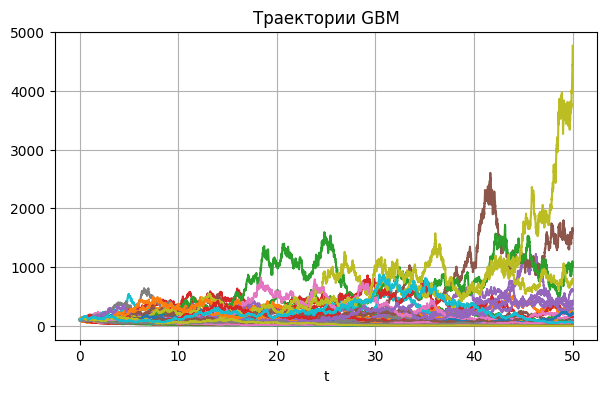

In [ ]:
f, ax = plt.subplots(figsize=(7,4))

ax.grid()
ax.set_title("Траектории GBM")
ax.set_xlabel("t")
ax.plot(ts,trajs.T)
plt.show()#if needed

### Оценка модели по данным


In [ ]:
# load data
with open("./gbmData.pkl", "rb") as f:
    dd=pkl.load(f)
    value = dd['value']
    time = dd['time']

In [ ]:
#random init
finalTime = time[-1]
delta = time[1]-time[0]
gbmProc = GBM(0.01, 0.01)
gbmProc.fit(value, delta)

print('mu_MLE', gbmProc.mu)
print('sigma_MLE', gbmProc.sigma)

mu_MLE 0.08419912929329919
sigma_MLE 0.19546453929856075


In [ ]:
#generating new trajectories
Ntraj = 10

x0 = np.ones([Ntraj])* value[0]
trajs = gbmProc.sample(x0, time)

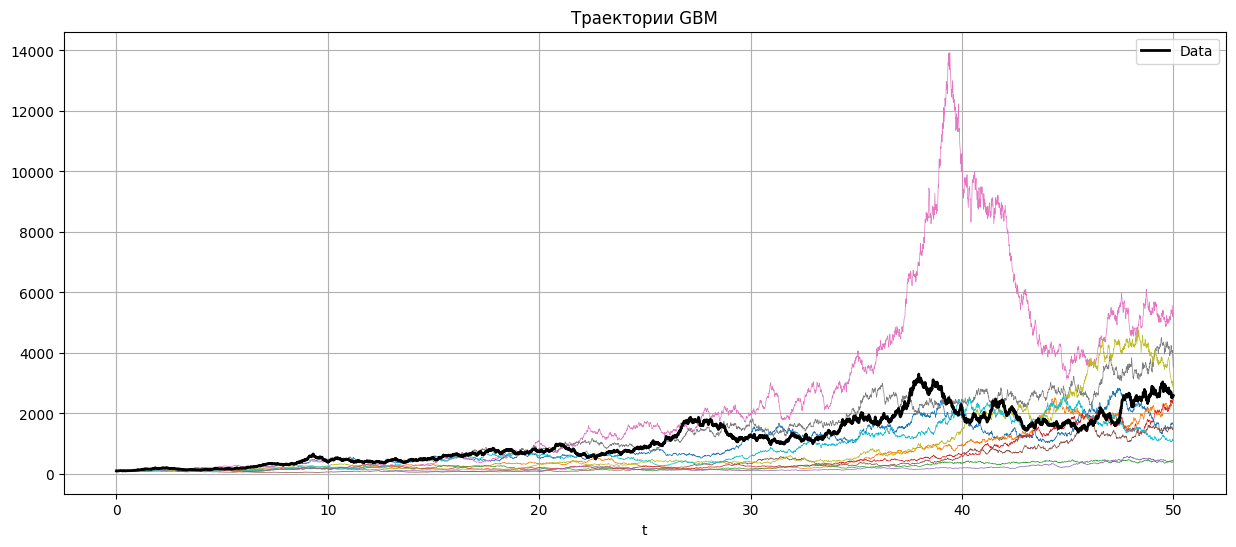

In [ ]:

f, ax = plt.subplots(figsize=(15,6))

ax.grid()
ax.set_title("Траектории GBM")
ax.set_xlabel("t")
ax.plot(time, trajs.T, linewidth=0.5)
ax.plot(time, value, color="black", label="Data", linewidth=2)
ax.legend()
plt.show()#if needed

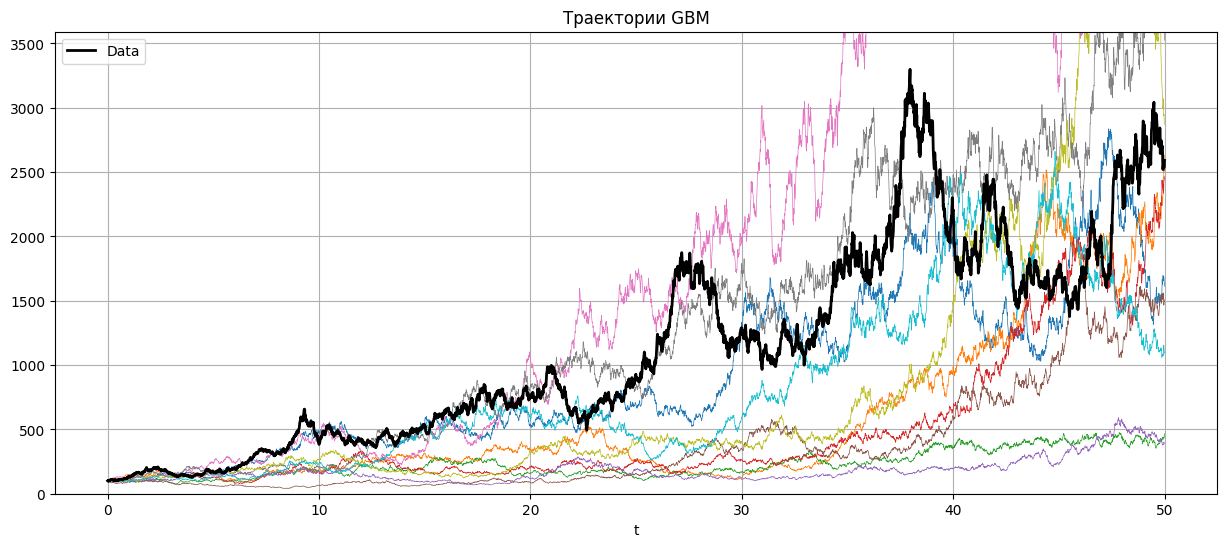

In [ ]:
f, ax = plt.subplots(figsize=(15,6))

ax.grid()
ax.set_title("Траектории GBM")
ax.set_xlabel("t")
ax.plot(time, trajs.T, linewidth=0.5)
ax.plot(time, value, color="black", label="Data", linewidth=2)
ax.set_ylim([0, value[-1] + 1000])
ax.legend()
plt.show()#if needed

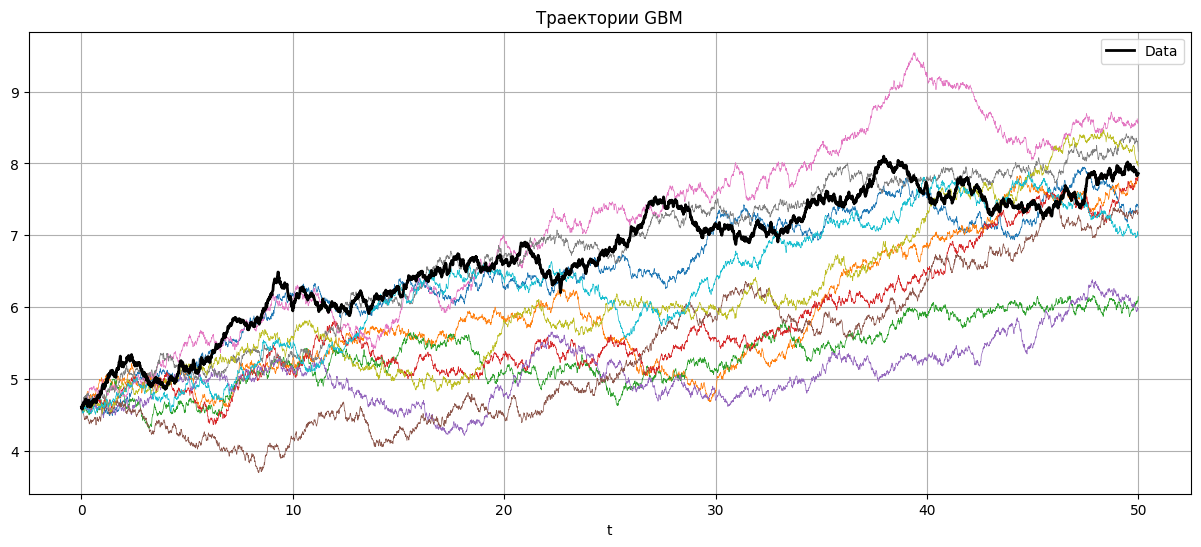

In [ ]:
f, ax = plt.subplots(figsize=(15,6))

ax.grid()
ax.set_title("Траектории GBM")
ax.set_xlabel("t")
ax.plot(time, np.log(trajs.T), linewidth=0.5)
ax.plot(time, np.log(value), color="black", label="Data", linewidth=2)
ax.legend()
plt.show()

По первым двум графикам (которые построены по исходным данным и оценке) трудно понять на сколько хорошая оценка у нас получилась. Если же мы отобразим графики логарифмов (последний график), то увидим, что траектория сгенерированных данных близка к траектории исходных данных.